## Problem Description:
The goal of this project is to predict individual incomes to identify those who may be in need of financial assistance. By accurately predicting income levels, we can better understand the factors that contribute to income disparities and evaluate the effectiveness of policies aimed at reducing income poverty.

## Importance:
Understanding income distribution is essential for policymakers to target resources effectively. Identifying individuals and groups that are most in need can help in designing interventions that reduce poverty and improve economic stability. This analysis can also provide insights into the socio-economic factors that influence income, aiding in more informed decision-making.

## Expected Outcome:
The expected outcome is a predictive model that accurately identifies individuals with lower incomes. Additionally, we aim to uncover insights into the key factors that contribute to income disparities, which can inform policy recommendations.

In [2]:
#import neccesarry libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load the dataset
data = pd.read_csv('adult.csv', header=None)

# Assign correct column names manually
data.columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
data.shape

(32561, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [8]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# First, check for placeholder values that might represent missing data
for column in data.columns:
    if data[column].dtype == 'object':  # Check only string columns
        unique_values = data[column].unique()
        print(f"Column '{column}' unique values:")
        print(unique_values)
        print("-" * 50)

Column 'workclass' unique values:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
--------------------------------------------------
Column 'education' unique values:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
--------------------------------------------------
Column 'marital-status' unique values:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
--------------------------------------------------
Column 'occupation' unique values:
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
-----------

In [ ]:
from sklearn.impute import SimpleImputer

# 1. Replace ' ?' with numpy NaN (note the space before ?)
data.replace(' ?', np.nan, inplace=True)

# 2. Check missing values after replacement
print("Missing values after replacement:")
print(data.isnull().sum())

# 3. Handle missing values with appropriate strategies
# For categorical columns with missing values
cat_cols_with_missing = ['workclass', 'occupation', 'native-country']
cat_imputer = SimpleImputer(strategy='most_frequent')
data[cat_cols_with_missing] = cat_imputer.fit_transform(data[cat_cols_with_missing])

# 4. Verify no missing values remain
print("\nFinal missing values check:")
print(data.isnull().sum())

# 5. Clean up whitespace in categorical columns (optional but recommended)
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].str.strip()

# 6. Show the unique values after cleaning
print("\nUnique values after cleaning:")
for col in cat_cols_with_missing:
    print(f"\nColumn '{col}':")
    print(data[col].unique())

Missing values after replacement:
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Final missing values check:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Unique values after cleaning:

Column 'workclass':
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Column 'occupation':
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other

In [14]:
#Helps you see class balance and potential categories to group or combine.
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")
    print(data[col].value_counts())
    print("-----")

workclass: 8 unique values
workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
-----
education: 16 unique values
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
-----
marital-status: 7 unique values
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
-----
occup

In [22]:
# Custom imputation strategy based on your value counts
imputation_strategy = {
    'workclass': 'Private',  # Most frequent (74.8% of values)
    'occupation': 'Prof-specialty',  # Most frequent occupation
    'native-country': 'United-States'  # Overwhelmingly most common (91.4%)
}

for col, value in imputation_strategy.items():
    data[col].fillna(value, inplace=True)
    print(f"Imputed {col} with '{value}'")

# Verify no missing values remain
print("\nMissing values after imputation:")
print(data.isnull().sum())

Imputed workclass with 'Private'
Imputed occupation with 'Prof-specialty'
Imputed native-country with 'United-States'

Missing values after imputation:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


# Exploratory Data Analysis(EDA)

In [15]:
#distribution of target variable 
data['income'].value_counts(normalize=True)

income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

Imbalanced dataset:

~76% earn ≤50K

~24% earn >50K

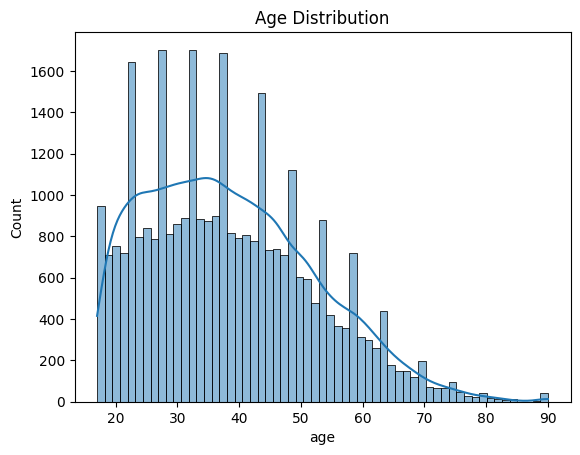

In [16]:
#Distribution of age 
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.show()

Observations:

The highest number of people are in their 20s to 40s.

The number of people decreases as age increases beyond 40.

There are fewer people in the older age groups (60 and above).

In simple terms, this chart shows that most people in this group are between 20 and 40 years old, and the number of people decreases as age increases

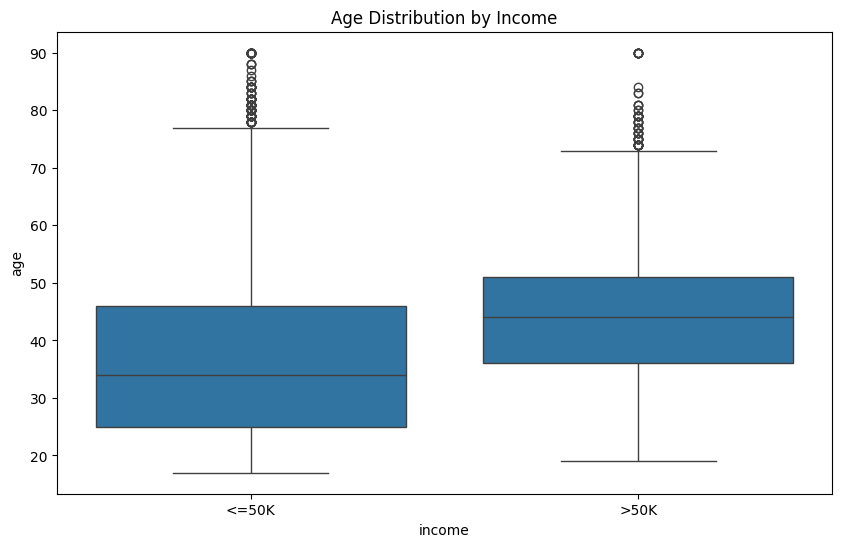

In [17]:
#Age vs Income
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=data)
plt.title('Age Distribution by Income')
plt.show()

In [18]:
#Compare the Average Age of Both Classes
data.groupby('income')['age'].mean()

income
<=50K    36.783738
>50K     44.249841
Name: age, dtype: float64

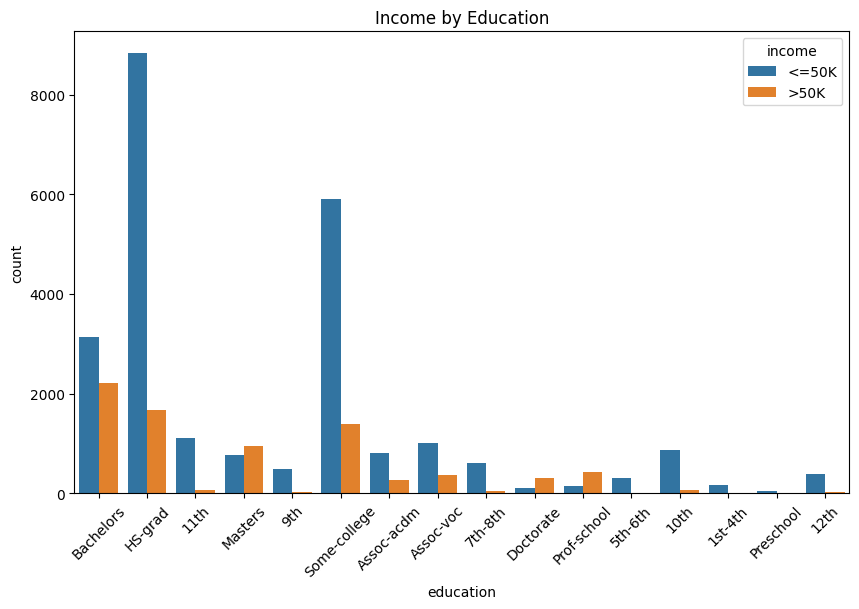

In [19]:
#Income by education 
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='income', data=data)
plt.xticks(rotation=45)
plt.title('Income by Education')
plt.show()

Key Insights from Education vs. Income:
More Education = Higher Income (Generally):

Individuals with higher education levels (Masters, Doctorate, Prof-school) are more likely to earn >50K, even though they represent a smaller portion of the population.

This means education is a strong predictor of income.

HS-Grad and Bachelors are Common:

These groups have many individuals, but most still earn <=50K.

This tells us that having a degree doesn’t automatically mean a higher income, especially for Bachelor's or below. Other factors like occupation, experience, and hours worked also play a role.

Low Education = Low Income:

People with minimal education (Preschool, 1st-4th grade, etc.) overwhelmingly earn <=50K.

These education levels may signal low-skilled or low-paying jobs.

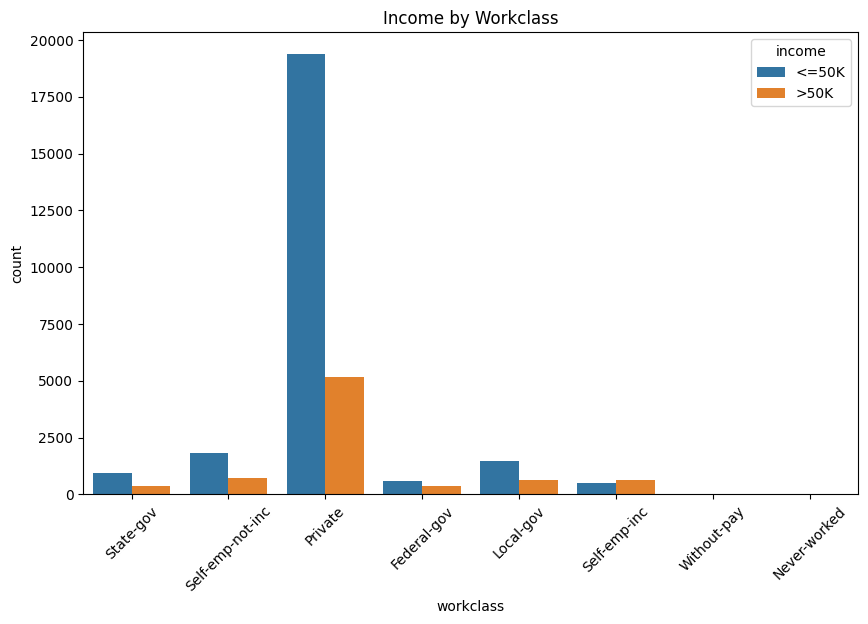

In [20]:
#Income by workclass
plt.figure(figsize=(10, 6))
sns.countplot(x='workclass', hue='income', data=data)
plt.xticks(rotation=45)
plt.title('Income by Workclass')
plt.show()

Observations:

Private Sector: This group has the highest number of people, with most earning 50K or less (tall blue bar). A smaller portion earns more than 50K (orange bar).

Self-emp-not-inc: A significant number of people are self-employed but not incorporated, with most earning 50K or less.
State-gov, Local-gov, Federal-gov: These groups have fewer people overall, with most earning 50K or less.

Self-emp-inc: People who are self-employed and incorporated have a higher proportion earning more than 50K compared to other groups.

Without-pay and Never-worked: Very few people fall into these categories, and most earn 50K or less.

In simple terms, this chart shows that most people work in the private sector, and the majority of them earn 50K or less per year. Self-employed individuals (not incorporated) also have a significant presence, mostly earning 50K or less. 
Government jobs (state, local, federal) have fewer people, with most earning 50K or less. Self-employed individuals who are incorporated tend to earn more than 50K. Very few people are without pay or have never worked.

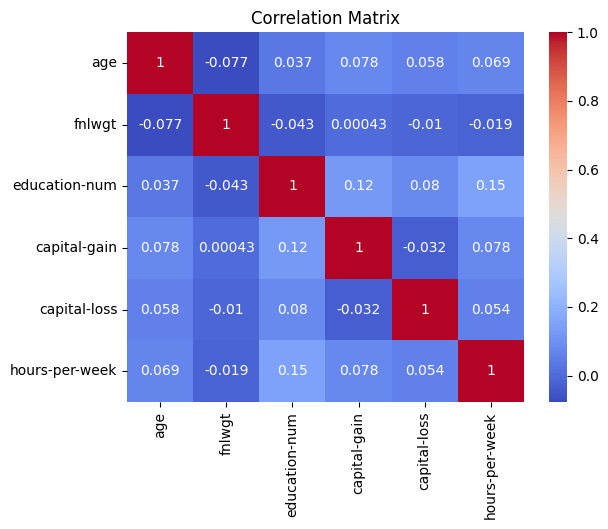

In [21]:
#Correlation between numerical values
corr = data.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

✅ 1. Weak Correlations
Most values are close to 0, meaning very weak relationships between most features.

✅ 2. Useful Insight
education-num has a positive correlation with capital-gain → People with higher education might invest more or better.

hours-per-week has a small positive correlation with capital-gain → People who work more tend to earn more through investments.

age has weak but positive correlations with things like capital-gain, hours-per-week → Older people might have more experience and better income sources.

✅ 3. Low Multicollinearity
No two features are very highly correlated , which means we likely don’t need to drop any variables due to redundancy.

# Feature Engineering

In [ ]:
# Create a binary column for capital gains
data['has_capital_gain'] = (data['capital-gain'] > 0).astype(int)
data['has_capital_loss'] = (data['capital-loss'] > 0).astype(int)

# Cap extreme values at 99th percentile
for col in ['capital-gain', 'capital-loss', 'hours-per-week']:
    upper_limit = data[col].quantile(0.99)
    data[col] = np.where(data[col] > upper_limit, upper_limit, data[col])


In [24]:
#Target variable encoding
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [30]:
# Handle rare categories (combining categories with very low counts)
def handle_rare_categories(data, column, threshold=100, new_category='Other'):
    counts = data[column].value_counts()
    rare_categories = counts[counts < threshold].index
    data[column] = data[column].replace(rare_categories, new_category)
    return data

# Apply to appropriate columns
data = handle_rare_categories(data, 'workclass', threshold=100)
data = handle_rare_categories(data, 'native-country', threshold=100)
data = handle_rare_categories(data, 'occupation', threshold=100)

In [27]:
# Create more meaningful age groups
data['age_group'] = pd.cut(data['age'],
                          bins=[0, 25, 35, 45, 55, 65, 100],
                          labels=['<25', '25-34', '35-44', '45-54', '55-64', '65+'])

# Drop original 'age' column
data.drop('age', axis=1, inplace=True)

In [28]:
# Simplify education levels
education_mapping = {
    'Preschool': 'No-HS',
    '1st-4th': 'No-HS',
    '5th-6th': 'No-HS',
    '7th-8th': 'No-HS',
    '9th': 'No-HS',
    '10th': 'No-HS',
    '11th': 'No-HS',
    '12th': 'No-HS',
    'HS-grad': 'HS',
    'Some-college': 'Some-College',
    'Assoc-voc': 'Associate',
    'Assoc-acdm': 'Associate',
    'Bachelors': 'Bachelors',
    'Masters': 'Masters',
    'Prof-school': 'Prof-school',
    'Doctorate': 'Doctorate'
}
data['education_simplified'] = data['education'].map(education_mapping)

# Drop the original education column
data.drop('education', axis=1, inplace=True)


In [29]:
#Create work hours categories
data['hours_category'] = pd.cut(data['hours-per-week'],
                               bins=[0, 20, 40, 60, 100],
                               labels=['Part-time', 'Full-time', 'Overtime', 'Excessive'])

# Drop the original hours-per-week column
data.drop('hours-per-week', axis=1, inplace=True)

Handling Class Imbalance

In [31]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = data.drop('income', axis=1)
y = data['income']

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64']).columns

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])


# Split data before resampling to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

train_columns = X_train.columns  # Save column names immediately after encoding
with open('columns.txt', 'w') as f:
    f.write('\n'.join(train_columns))

#  SMOTE (Best for moderate imbalance)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(preprocessor.fit_transform(X_train), y_train)

y_res.value_counts(normalize=True)

income
1    0.5
0    0.5
Name: proportion, dtype: float64

# Model Creation

In [32]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report

# Full pipeline with SMOTE and RandomForest
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train model
pipeline.fit(X_train, y_train)

# Evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      4945
           1       0.57      0.62      0.59      1568

    accuracy                           0.80      6513
   macro avg       0.72      0.74      0.73      6513
weighted avg       0.80      0.80      0.80      6513



Issue: The model favors class 0. Precision and recall for class 1 are low — meaning it's missing a lot of people who earn >50K (recall=0.62) and also misclassifying a decent number of them (precision=0.57).

In [33]:
from xgboost import XGBClassifier
# Use XGBoost with scale_pos_weight
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight,
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5
    ))
])

# Train
pipeline.fit(X_train, y_train)

# Evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.66      0.79      4945
           1       0.46      0.92      0.62      1568

    accuracy                           0.73      6513
   macro avg       0.71      0.79      0.70      6513
weighted avg       0.84      0.73      0.75      6513



Overall Accuracy: 73%

Class 1 Recall Improved Massively ✅ (from 0.62 → 0.92) — Great for identifying >50K earners!

Class 1 Precision Dropped ❌ (from 0.57 → 0.46) — meaning more false positives now.

Class 0 Recall Dropped ❌ — it's now missing more people who earn ≤50K.

🎯 What This Means
You’ve swung the balance:

Now you capture nearly all high earners (great recall for class 1),

But you’re misclassifying many low earners as high earners (bad precision for class 1, lower recall for class 0).

This is a common trade-off when using SMOTE + scale_pos_weight: the model focuses hard on detecting the minority class.

In [34]:
from sklearn.metrics import precision_recall_curve, classification_report

# Get predicted probabilities for class 1
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Try a threshold (e.g., 0.6 instead of 0.5)
custom_threshold = 0.6
y_pred_custom = (y_proba >= custom_threshold).astype(int)

# Evaluate
print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       0.95      0.72      0.82      4945
           1       0.50      0.88      0.64      1568

    accuracy                           0.76      6513
   macro avg       0.73      0.80      0.73      6513
weighted avg       0.84      0.76      0.78      6513



 Key Improvements:
Better precision for class 1 (was 0.46 → now 0.50 ✅)

High recall for class 1 maintained (still 0.88 ✅)

Overall accuracy improved (from 73% → now 76% ✅)

More balanced performance compared to before!



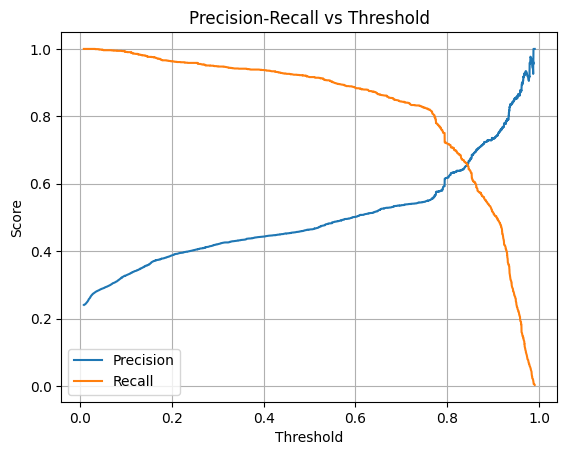

In [35]:
from sklearn.metrics import precision_recall_curve

# Predict probabilities
y_proba = pipeline.predict_proba(X_test)[:, 1]
prec, rec, thresholds = precision_recall_curve(y_test, y_proba)

# Plot
plt.plot(thresholds, prec[:-1], label='Precision')
plt.plot(thresholds, rec[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()


You're getting high recall (0.88) for class 1 (>50K) — excellent at catching true positives.

But precision is 0.50, meaning 50% of your class 1 predictions are false positives.

# Ensemble of Models

In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression


cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64']).columns


# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Classifiers
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)

voting_model = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('rf', rf),
        ('xgb', xgb)
    ],
    voting='soft'
)

# Final pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', voting_model)
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Fit
pipeline.fit(X_train, y_train)

# Predict probabilities
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Custom threshold
threshold = 0.6
y_pred_thresh = (y_proba >= threshold).astype(int)

# Evaluate
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4945
           1       0.64      0.68      0.66      1568

    accuracy                           0.83      6513
   macro avg       0.77      0.78      0.78      6513
weighted avg       0.84      0.83      0.83      6513



✅ Overall Accuracy: 83%
⚖️ Macro F1-score: 0.78 (Balanced performance across both classes)
Class 0 (majority) is predicted very well — high precision and recall.

Class 1 (minority) performance has improved significantly over your earlier models:

Precision: from ~0.46 → 0.64

Recall: from ~0.66 → 0.68

F1-score: from ~0.62 → 0.66

# Model Comparison Visualization

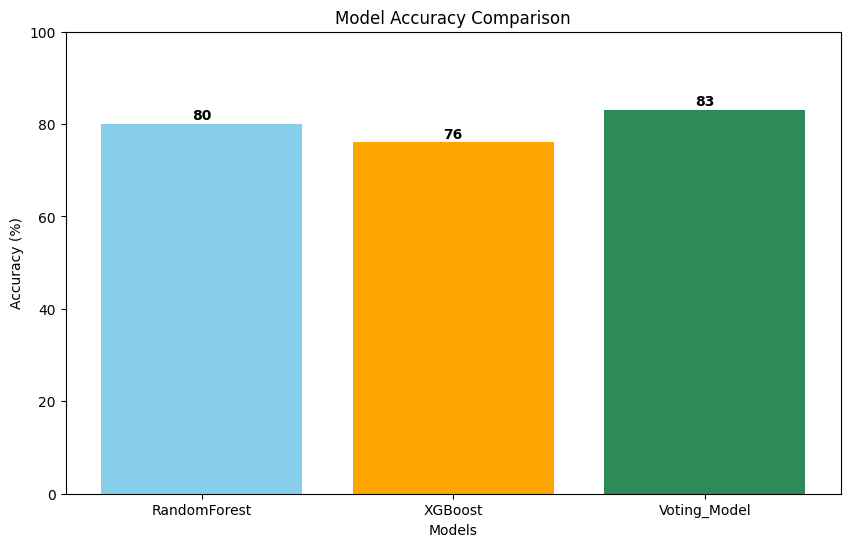

In [54]:
#Accuracy Comparison Bar Chart

models = ['RandomForest', 'XGBoost', 'Voting_Model',]
accuracies = [80, 76, 83,]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'orange', 'seagreen'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, str(v), ha='center', fontweight='bold')
plt.show()

In [55]:
import joblib
# Save the model
joblib.dump(voting_model, 'adult_income_voting_model.pkl')
joblib.dump(preprocessor, 'adult_income_preprocessor.pkl')
joblib.dump(smote, 'adult_income_smote.pkl')
joblib.dump(pipeline, 'adult_income_pipeline.pkl')
joblib.dump(X_train, 'X_train.pkl')
joblib.dump(y_train, 'y_train.pkl')

# Save the column names
with open('columns.txt', 'w') as f:
    f.write('\n'.join(train_columns))
